In [1]:
from google.cloud import aiplatform
from google.cloud.aiplatform.gapic.schema import predict
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value
from google.oauth2 import service_account
from typing import Dict, List, Union
import warnings
warnings.filterwarnings("ignore")

In [2]:
key_path = './comp-840-383000-6fe1e2bfea98.json'
credentials = service_account.Credentials.from_service_account_file(key_path)

In [3]:
def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-east1",
    api_endpoint: str = "us-east1-aiplatform.googleapis.com",
):
    """
    `instances` can be either single instance of type dict or a list
    of instances.
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options, credentials=credentials)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if type(instances) == list else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    print(instances)
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions
    #print(" prediction:", predictions)
    for prediction in predictions:
        print(" prediction:", dict(prediction))

In [4]:
predict_custom_trained_model_sample(
    project="691241680216",
    endpoint_id="5470189095441399808",
    location="us-east1",
    instances=[{'Animal_ID':'A794011', 'Name':'Chunk', 'DateTime':'05/08/2019 18:20:00', 'MonthYear':'May 2019', 'Date_of_Birth':'05/02/2017','Outcome_Subtype':'Partner', 'Animal_Type':'Cat', 'Sex_upon_Outcome':'Neutered Male','Age_upon_Outcome':'2 years', 'Breed':'Domestic Shorthair Mix', 'Color':'Brown Tabby/White'}]
)

[struct_value {
  fields {
    key: "Age_upon_Outcome"
    value {
      string_value: "2 years"
    }
  }
  fields {
    key: "Animal_ID"
    value {
      string_value: "A794011"
    }
  }
  fields {
    key: "Animal_Type"
    value {
      string_value: "Cat"
    }
  }
  fields {
    key: "Breed"
    value {
      string_value: "Domestic Shorthair Mix"
    }
  }
  fields {
    key: "Color"
    value {
      string_value: "Brown Tabby/White"
    }
  }
  fields {
    key: "DateTime"
    value {
      string_value: "05/08/2019 18:20:00"
    }
  }
  fields {
    key: "Date_of_Birth"
    value {
      string_value: "05/02/2017"
    }
  }
  fields {
    key: "MonthYear"
    value {
      string_value: "May 2019"
    }
  }
  fields {
    key: "Name"
    value {
      string_value: "Chunk"
    }
  }
  fields {
    key: "Outcome_Subtype"
    value {
      string_value: "Partner"
    }
  }
  fields {
    key: "Sex_upon_Outcome"
    value {
      string_value: "Neutered Male"
    }
  }
}
]
res

In [5]:
#A Exploratory Data Analysis and Feature Engineering
import numpy as np
import pandas as pd

df_1 = pd.read_csv('./Animal_.csv')

In [6]:
df_1.describe()

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_upon_Outcome,Age_upon_Outcome,Breed,Color
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,997,615,987,120,854,7,15,4,5,40,218,128
top,A788817,Luna,06/13/2023 06:33:00 PM,Jun 2023,06/07/2023,Adoption,Partner,Dog,Neutered Male,2 years,Domestic Shorthair Mix,Black
freq,2,288,4,41,5,471,765,554,352,175,225,89


In [7]:
df_1.shape

(1000, 12)

In [8]:
df_1.dtypes

Animal_ID           object
Name                object
DateTime            object
MonthYear           object
Date_of_Birth       object
Outcome_Type        object
Outcome_Subtype     object
Animal_Type         object
Sex_upon_Outcome    object
Age_upon_Outcome    object
Breed               object
Color               object
dtype: object

In [9]:
df_1.head()

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_upon_Outcome,Age_upon_Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 18:20:00,May 2019,05/02/2017,Rto-Adopt,Partner,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,Partner,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,Luna,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,Partner,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,Partner,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,Luna,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal_ID         1000 non-null   object
 1   Name              1000 non-null   object
 2   DateTime          1000 non-null   object
 3   MonthYear         1000 non-null   object
 4   Date_of_Birth     1000 non-null   object
 5   Outcome_Type      1000 non-null   object
 6   Outcome_Subtype   1000 non-null   object
 7   Animal_Type       1000 non-null   object
 8   Sex_upon_Outcome  1000 non-null   object
 9   Age_upon_Outcome  1000 non-null   object
 10  Breed             1000 non-null   object
 11  Color             1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [11]:
print(df_1.columns)

Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Type', 'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object')


In [12]:
outcome_type_map = {'Adoption': 1, 'Transfer': 2, 'Return to Owner': 3, 'Euthanasia': 4, 'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7}
df_1['Outcome_Type'] = df_1['Outcome_Type'].map(outcome_type_map)


In [13]:
df = df_1.copy()
df.head()

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_upon_Outcome,Age_upon_Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 18:20:00,May 2019,05/02/2017,6,Partner,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,1,Partner,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,Luna,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,4,Partner,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,1,Partner,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,Luna,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,2,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [15]:
model_features = df.columns.drop('Outcome_Type')
model_target = 'Outcome_Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object')
Model target:  Outcome_Type


In [16]:
target_map = {'Adoption': 1, 'Return to Owner': 2, 'Transfer': 3, 'Euthanasia':4, 'Died':5, 'Rto-Adopt':6, 'Disposal':7}
df['Target_Numeric'] = df['Outcome_Type'].map(target_map)


In [17]:
df.head()

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Animal_Type,Sex_upon_Outcome,Age_upon_Outcome,Breed,Color,Target_Numeric
0,A794011,Chunk,05/08/2019 18:20:00,May 2019,05/02/2017,6,Partner,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,NaN
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,1,Partner,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,NaN
2,A821648,Luna,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,4,Partner,Other,Unknown,1 year,Raccoon,Gray,NaN
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,1,Partner,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,NaN
4,A674754,Luna,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,2,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,NaN


In [18]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)


Numerical columns: Index([], dtype='object')

Categorical columns: Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object')


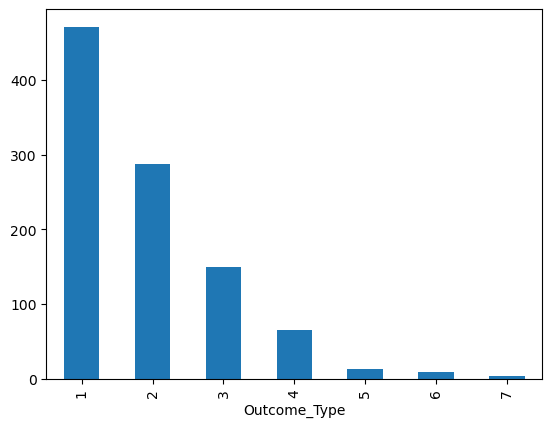

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

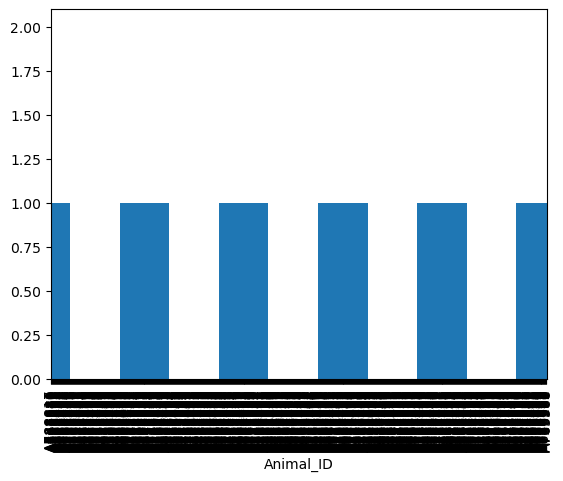

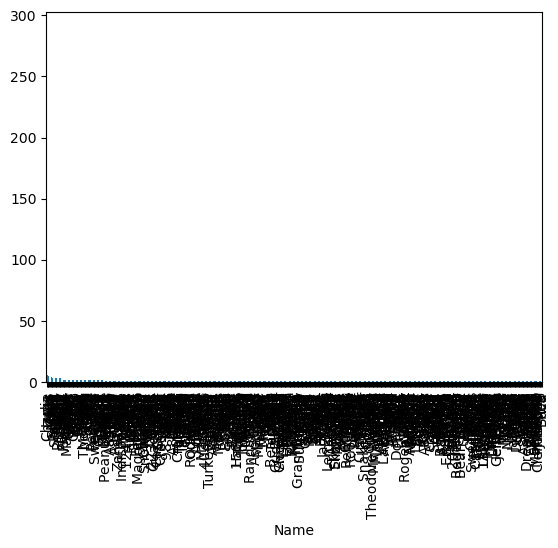

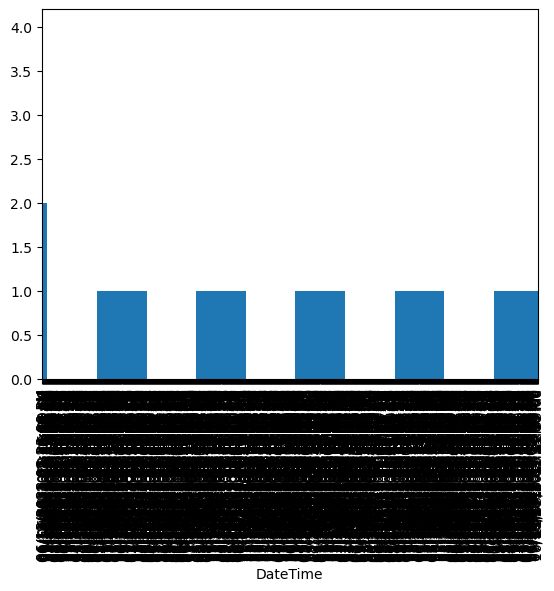

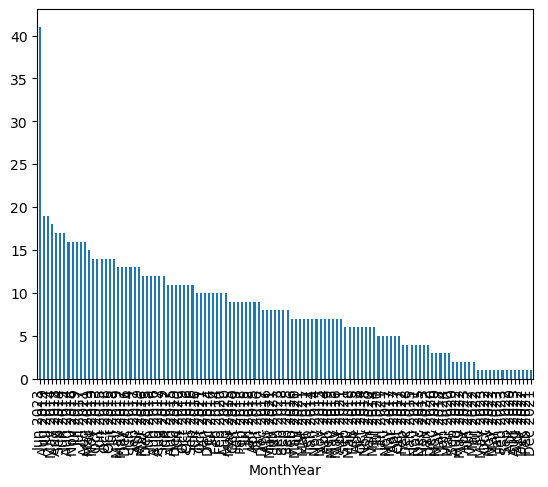

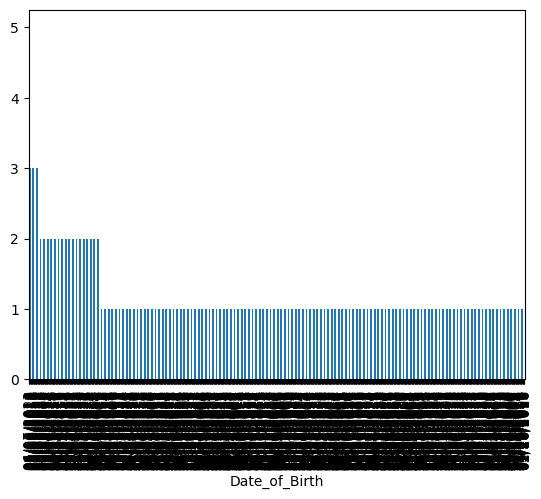

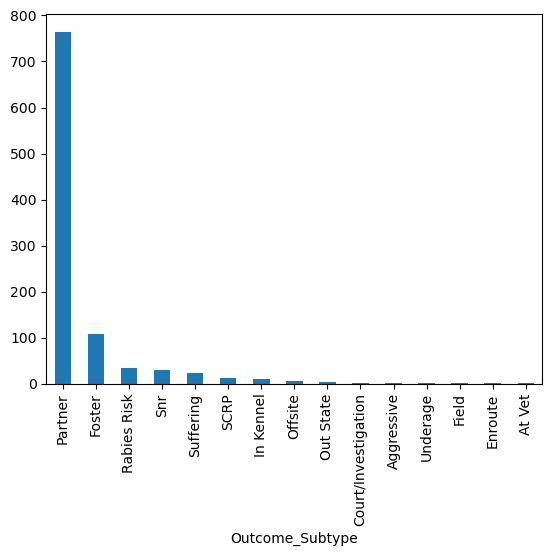

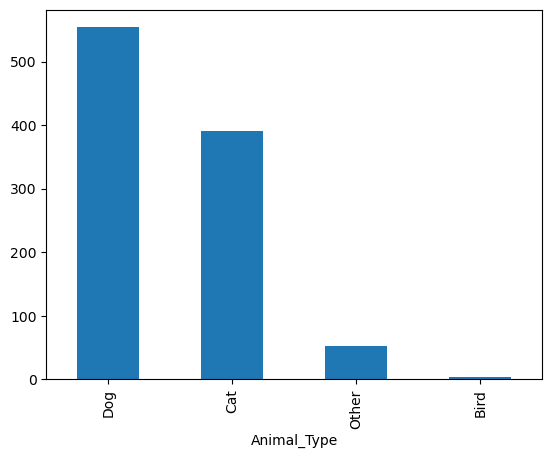

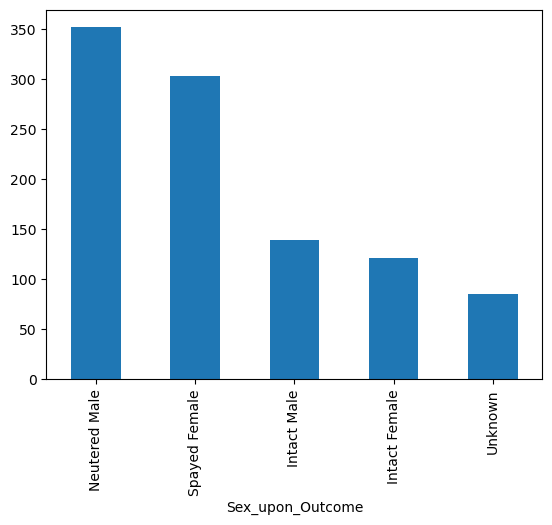

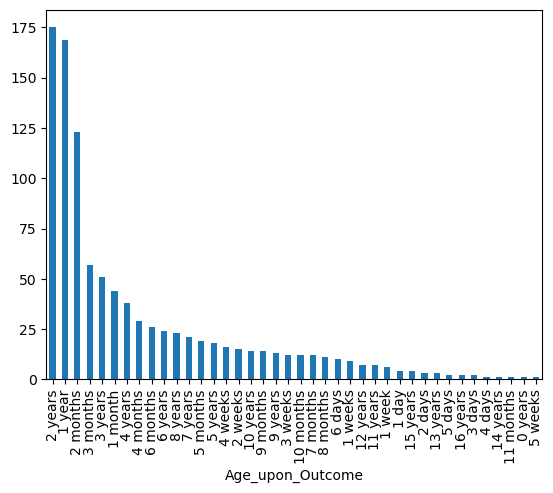

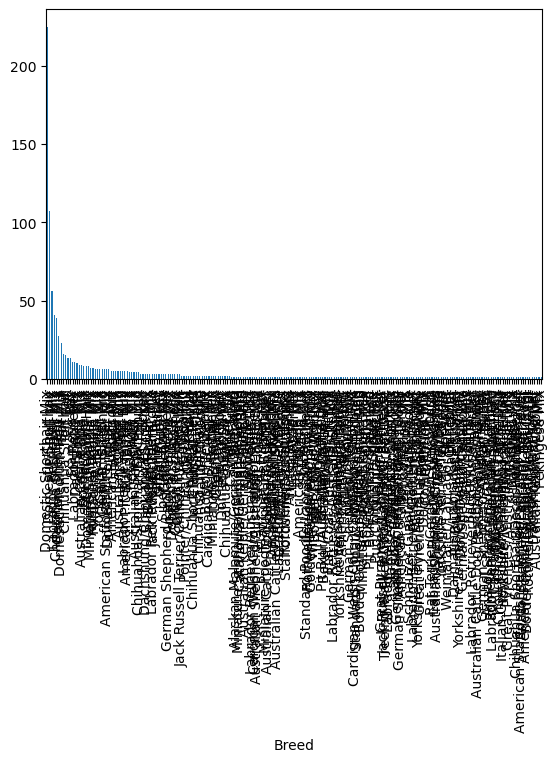

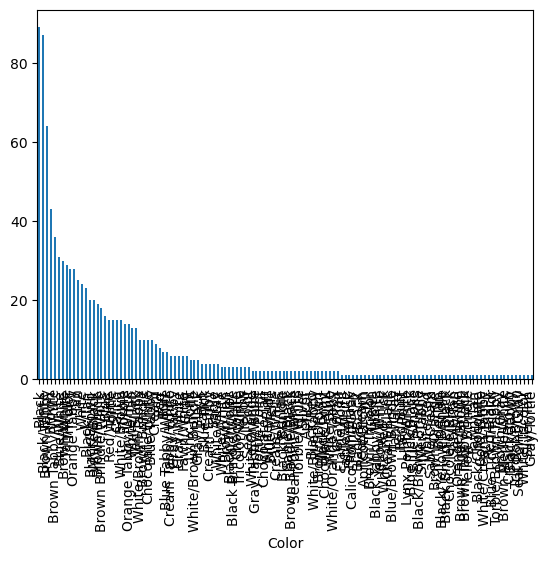

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    #if len(df[c].value_counts()) <= 100:
     #   print(c)
    df[c].value_counts().plot.bar()
    plt.show()

Animal_Type


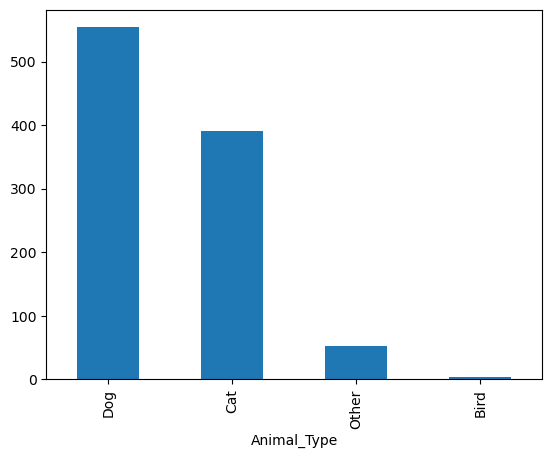

Sex_upon_Outcome


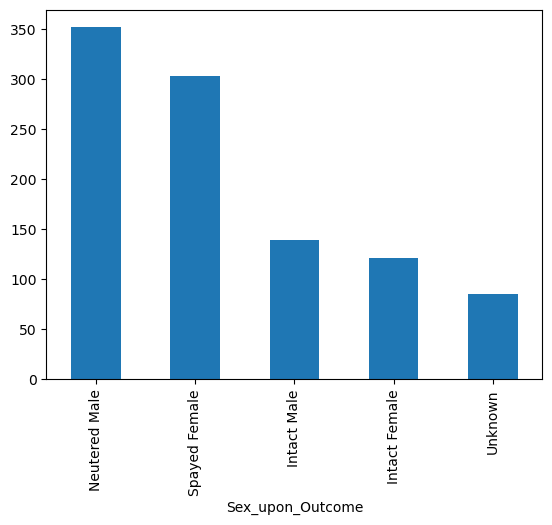

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) <= 10:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [21]:
df[model_target].value_counts()

Outcome_Type
1    471
2    288
3    150
4     65
5     13
6      9
7      4
Name: count, dtype: int64

In [22]:
print('Training set shape:', train_data.shape)

print('Class Adoption samples in the training set:', sum(train_data[model_target] == 1))
print('Class Transfer samples in the training set:', sum(train_data[model_target] == 2))
print('Class Return to Owner samples in the training set:', sum(train_data[model_target] == 3))
print('Class Euthanasia samples in the training set:', sum(train_data[model_target] == 4))
print('Class Died samples in the training set:', sum(train_data[model_target] == 5))
print('Class Rto-Adopt samples in the training set:', sum(train_data[model_target] == 6))
print('Class Disposal samples in the training set:', sum(train_data[model_target] == 7))


print('Class Adoption samples in the training set:', sum(test_data[model_target] == 1))
print('Class Transfer samples in the training set:', sum(test_data[model_target] == 2))
print('Class Return to Owner samples in the training set:', sum(test_data[model_target] == 3))
print('Class Euthanasia samples in the training set:', sum(test_data[model_target] == 4))
print('Class Died samples in the training set:', sum(test_data[model_target] == 5))
print('Class Rto-Adopt samples in the training set:', sum(test_data[model_target] == 6))
print('Class Disposal samples in the training set:', sum(test_data[model_target] == 7))

Training set shape: (800, 12)
Class Adoption samples in the training set: 368
Class Transfer samples in the training set: 232
Class Return to Owner samples in the training set: 124
Class Euthanasia samples in the training set: 56
Class Died samples in the training set: 11
Class Rto-Adopt samples in the training set: 8
Class Disposal samples in the training set: 1
Class Adoption samples in the training set: 103
Class Transfer samples in the training set: 56
Class Return to Owner samples in the training set: 26
Class Euthanasia samples in the training set: 9
Class Died samples in the training set: 2
Class Rto-Adopt samples in the training set: 1
Class Disposal samples in the training set: 3


In [23]:
from sklearn.utils import shuffle

max_samples = train_data[model_target].value_counts().max()

balanced_train_data = pd.concat(
    [train_data[train_data[model_target] == cls].sample(max_samples, replace=True)
     for cls in train_data[model_target].unique()],
    axis=0
)

balanced_train_data = shuffle(balanced_train_data).reset_index(drop=True)

print('New Training set shape:', balanced_train_data.shape)
print('Class distribution in balanced training set:')
print(balanced_train_data[model_target].value_counts())

New Training set shape: (2576, 12)
Class distribution in balanced training set:
Outcome_Type
3    368
4    368
6    368
1    368
5    368
7    368
2    368
Name: count, dtype: int64


In [24]:
#categorical_features = ['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth','Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome','Age_upon_Outcome', 'Breed', 'Color']

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
])
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features_all),
    ('categorical_pre', categorical_processor, categorical_features_all)
])
# Pipeline desired all data transformers, along with an estimator at the end
# Later you can set/reach the parameters using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier()) # n_neighbors defaults to 5
])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier())])

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[368   0   0   0   0   0   0]
 [  0 232   0   0   0   0   0]
 [  0   0 124   0   0   0   0]
 [  0   0   0  56   0   0   0]
 [  0   0   0   0  11   0   0]
 [  0   0   0   0   0   8   0]
 [  0   0   0   0   0   0   1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       368
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         1

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy (training): 1.0
[[89 10  4  0  0  0  0]
 [14 41  1  0  0  0  0]
 [15  4  7  0  0  0  0]
 [ 1  0  0  8  0  0  0]
 [ 0  1  0  0  1  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  1  0  2  0

In [27]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1] 

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

print('AUC:', roc_auc)


AUC: 0.3062756480832749


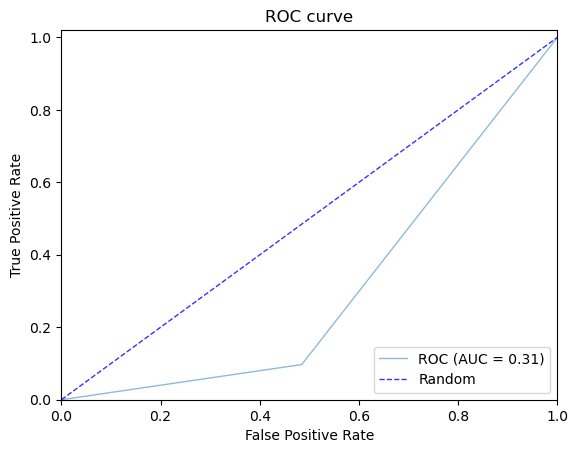

In [29]:
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', label='Random', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6]
}
param_grid={'dt__max_depth': [10, 20, 30,50,100],#, 50, 75, 100, 125, 150, 200, 250], 
            'dt__min_samples_leaf': [1, 5, 10, 15],#, 25, 30],
            'dt__min_samples_split': [2, 5, 15]#, 25, 30, 45, 50]
           }


grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index([], dtype='object')),
                                                                        ('categorical_pre',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('cat_encoder',
                                                                                          On...ore'))]),
                                                                         Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object'))])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [10, 20, 30, 50, 100],
                         'dt__min_samples_leaf': [1, 5, 10, 15],
                         'dt__min_samples_split': [2, 5, 15]},
             verbose=1)

In [31]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_
# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=30, min_samples_split=5))])

In [32]:
clf = grid_search.best_params_
print(clf)

{'dt__max_depth': 30, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[368   0   0   0   0   0   0]
 [  0 232   0   0   0   0   0]
 [  0   0 124   0   0   0   0]
 [  0   0   0  56   0   0   0]
 [  0   0   0   0  11   0   0]
 [  0   0   0   0   0   8   0]
 [  0   0   0   0   0   0   1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       368
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         1

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy (training): 1.0
[[89 10  4  0  0  0  0]
 [14 41  1  0  0  0  0]
 [15  5  6  0  0  0  0]
 [ 1  0  0  8  0  0  0]
 [ 0  1  0  0  1  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  1  0  2  0

In [34]:
from sklearn.metrics import roc_curve, auc
y_pred = pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

AUC: 0.2261535381843659


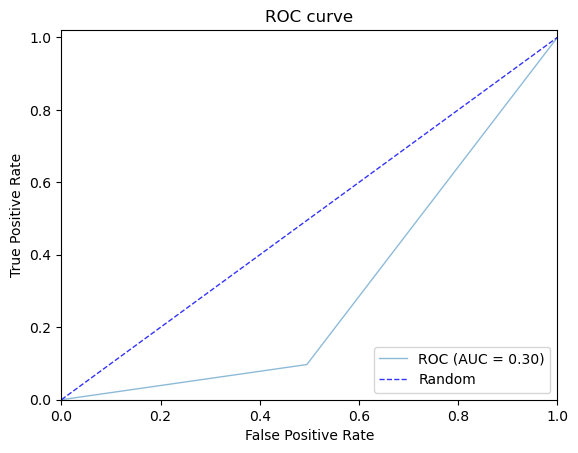

In [35]:
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, alpha=0.5, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', label='Random', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
import numpy as np
import pandas as pd

label = {0: 'Adoption', 2: 'transfer', 3:'Return to Owner', 4:'Euthanasia', 5:'Died', 6:'Rto-Adopt', 7:'Disposal'}
cat_features = ['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth','Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome','Age_upon_Outcome', 'Breed', 'Color']

# Define a function to encode the categorical features
def encode_cat_features(data):
    encoder = pd.get_dummies(data, columns=cat_features, drop_first=True)
    # Make sure all columns are included
    for col in cat_features:
        if col not in encoder.columns:
            encoder[col] = 0
    # Reorder columns to match the model input
    encoder = encoder[['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth','Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome','Age_upon_Outcome', 'Breed', 'Color']]
    return encoder

# Define the example as a list of values
example = ['A794011','Chunk','05/08/2019 18:20:00','May 2019','05/02/2017','Partner','Cat','Neutered Male','2 years','Domestic Shorthair Mix','Brown Tabby/White']

# Convert the example to a Pandas DataFrame and encode the categorical features
example_df = pd.DataFrame([example], columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth','Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome','Age_upon_Outcome', 'Breed', 'Color'])
example_encoded = encode_cat_features(example_df)

# Make the prediction using the pipeline object
prediction = pipeline.predict(example_encoded)[0]
print('Prediction:', label[prediction])


Prediction: Died


In [37]:
import pickle

with open('model.pkl', 'wb') as model_file:
  pickle.dump(classifier, model_file)

In [38]:
saved_model_pipeline = pickle.load(open('model.pkl', "rb" ))

In [39]:
saved_model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  Index([], dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth',
       'Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome',
       'Age_upon_Outcome', 'Breed', 'Color'],
      dtype='object'))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=30, min_samples_split=5))])

In [40]:
# Evaluate the pipeline on the test set
from sklearn.metrics import classification_report
y_predict = saved_model_pipeline.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.74      0.87      0.80       103
           2       0.70      0.71      0.71        56
           3       0.60      0.23      0.33        26
           4       0.80      0.89      0.84         9
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.73       200
   macro avg       0.55      0.46      0.48       200
weighted avg       0.70      0.72      0.70       200



In [41]:
key_path = './comp-840-383000-6fe1e2bfea98.json'
credentials = service_account.Credentials.from_service_account_file(key_path)

In [42]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder instance
le = LabelEncoder()

# fit and transform the categorical data
categorical_data = ['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth','Outcome_Subtype', 'Animal_Type', 'Sex_upon_Outcome','Age_upon_Outcome', 'Breed', 'Color']
encoded_data = le.fit_transform(categorical_data)

# print the encoded data
print(encoded_data)


[ 1  8  5  7  6  9  2 10  0  3  4]


In [43]:
def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-east1",
    api_endpoint: str = "us-east1-aiplatform.googleapis.com",
):
    """
    instances can be either single instance of type dict or a list
    of instances.
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options, credentials=credentials)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if type(instances) == list else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    print(instances)
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    predictions = response.predictions
    #print(" prediction:", predictions)
    for prediction in predictions:
        if isinstance(prediction, dict):
            print("prediction:",  dict(prediction))
        else:
            print("prediction:", prediction)

In [44]:
predict_custom_trained_model_sample(
    project="691241680216",
    endpoint_id="5470189095441399808",
    location="us-east1",
    instances = [{'Animal_ID':'A794011', 'Name':'Chunk', 'DateTime':'05/08/2019 18:20:00', 'MonthYear':'May 2019', 'Date_of_Birth':'05/02/2017','Outcome_Subtype':'Partner', 'Animal_Type':'Cat', 'Sex_upon_Outcome':'Neutered Male','Age_upon_Outcome':'2 years', 'Breed':'Domestic Shorthair Mix', 'Color':'Brown Tabby/White'}]

)

[struct_value {
  fields {
    key: "Age_upon_Outcome"
    value {
      string_value: "2 years"
    }
  }
  fields {
    key: "Animal_ID"
    value {
      string_value: "A794011"
    }
  }
  fields {
    key: "Animal_Type"
    value {
      string_value: "Cat"
    }
  }
  fields {
    key: "Breed"
    value {
      string_value: "Domestic Shorthair Mix"
    }
  }
  fields {
    key: "Color"
    value {
      string_value: "Brown Tabby/White"
    }
  }
  fields {
    key: "DateTime"
    value {
      string_value: "05/08/2019 18:20:00"
    }
  }
  fields {
    key: "Date_of_Birth"
    value {
      string_value: "05/02/2017"
    }
  }
  fields {
    key: "MonthYear"
    value {
      string_value: "May 2019"
    }
  }
  fields {
    key: "Name"
    value {
      string_value: "Chunk"
    }
  }
  fields {
    key: "Outcome_Subtype"
    value {
      string_value: "Partner"
    }
  }
  fields {
    key: "Sex_upon_Outcome"
    value {
      string_value: "Neutered Male"
    }
  }
}
]
res